<div style="display: flex; justify-content: center; margin: auto; width: 100%;">
  <img src="https://www.uniagraria.edu.co/wp-content/uploads/2023/04/LogoUa2023Horizontal.png" alt="Logo de Uniagraria" width="300"/>
  <img src="https://matplotlib.org/2.1.0/_static/logo2.svg" alt="Logo de Pandas" width="250"/>
</div>


---
<p align="center" style="color:green; font-size:20px;">
VISUALIZACIÓN DE DATOS
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset limpio
df = pd.read_csv('titanic_limpio.csv')

# Ver las primeras filas para confirmar que la carga fue exitosa
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,fare_normalized,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,0.014151,True,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,0.139136,False,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0.015469,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,0.103644,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0.015713,True,False,True


## Histogramas.

Usamos plt.hist para crear un histograma de la distribución de las edades de los pasajeros. El parámetro dropna() elimina valores nulos en la columna age.

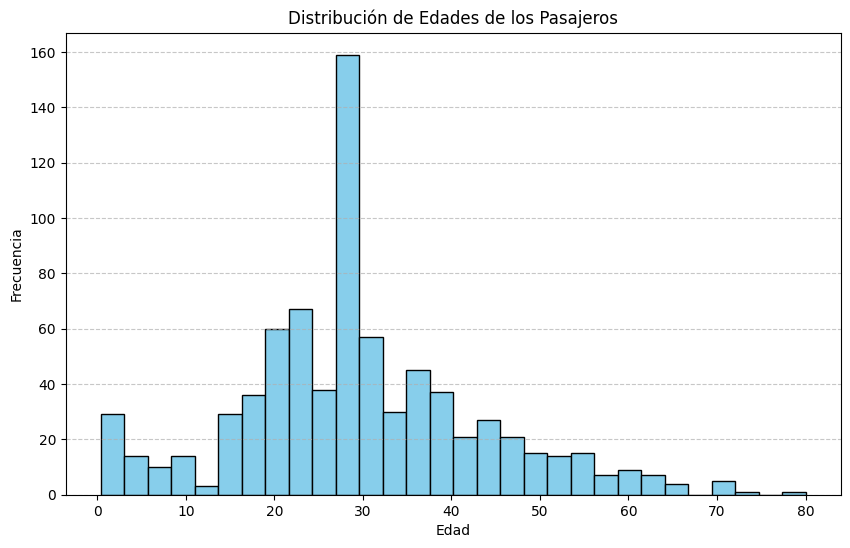

In [3]:
# Histograma de la columna "age" para ver la distribución de edades
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Gráficos de Barras

Creamos un gráfico de barras usando plt.bar para mostrar la cantidad de pasajeros en cada clase.

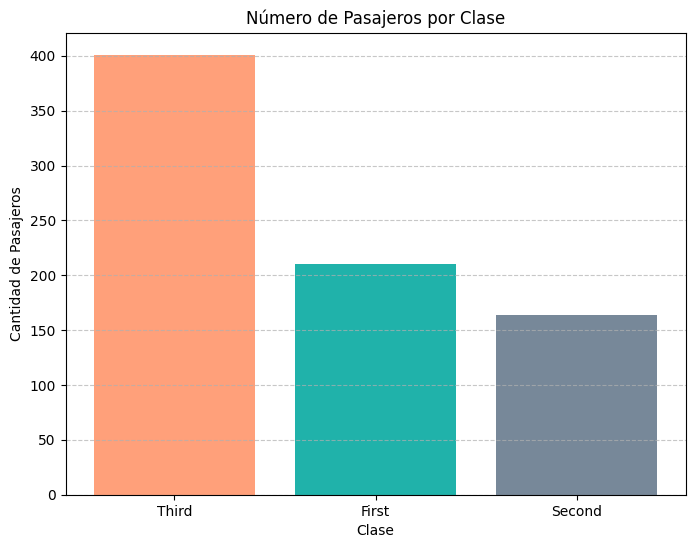

In [4]:
# Gráfico de barras para el número de pasajeros en cada clase
plt.figure(figsize=(8, 6))
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['#FFA07A', '#20B2AA', '#778899'])
plt.title('Número de Pasajeros por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de Pasajeros')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Grafico de Torta (pie)

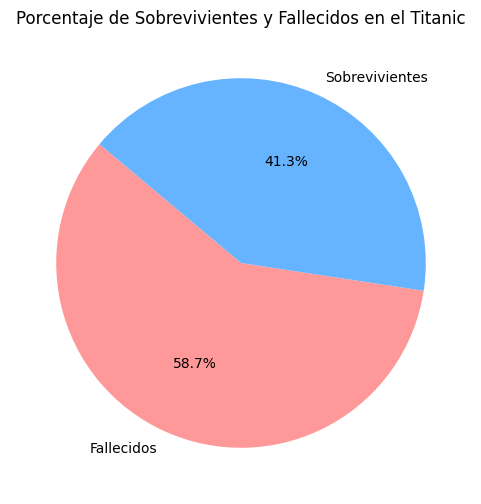

In [10]:
#Calcular la cantidad de sobrevivientes y fallecidos
survival_counts = df['survived'].value_counts()

# Etiquetas y colores para el gráfico
labels = ['Fallecidos', 'Sobrevivientes']
colors = ['#ff9999', '#66b3ff']

# Crear el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Sobrevivientes y Fallecidos en el Titanic')
plt.show()

## Detección de Outliers

Utilizamos plt.boxplot para crear un boxplot de la columna fare, lo cual nos ayuda a identificar valores atípicos (outliers) en las tarifas de los pasajeros.

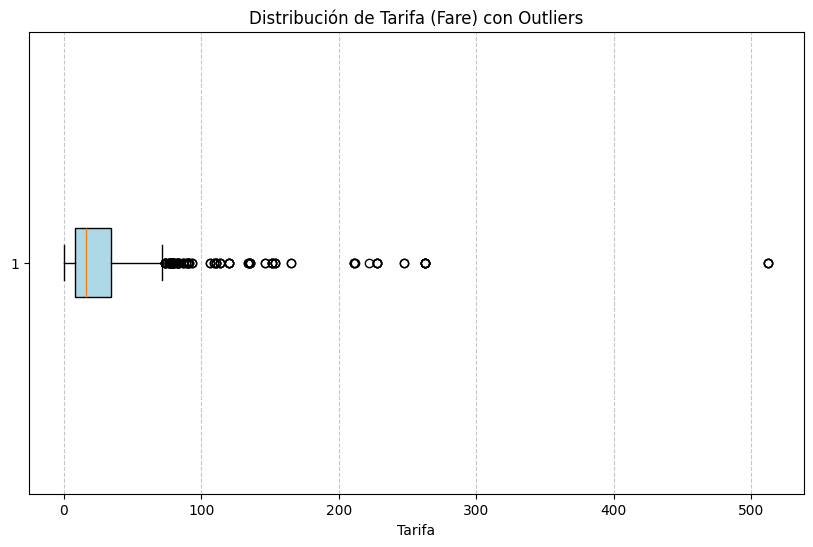

In [5]:
# Boxplot para detectar outliers en la columna "fare"
plt.figure(figsize=(10, 6))
plt.boxplot(df['fare'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Distribución de Tarifa (Fare) con Outliers')
plt.xlabel('Tarifa')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 3.3.3 Correlación de Datos

Utilizamos plt.imshow para representar la matriz de correlación como un mapa de calor en Matplotlib. Las etiquetas de los ejes corresponden a las columnas del dataset.

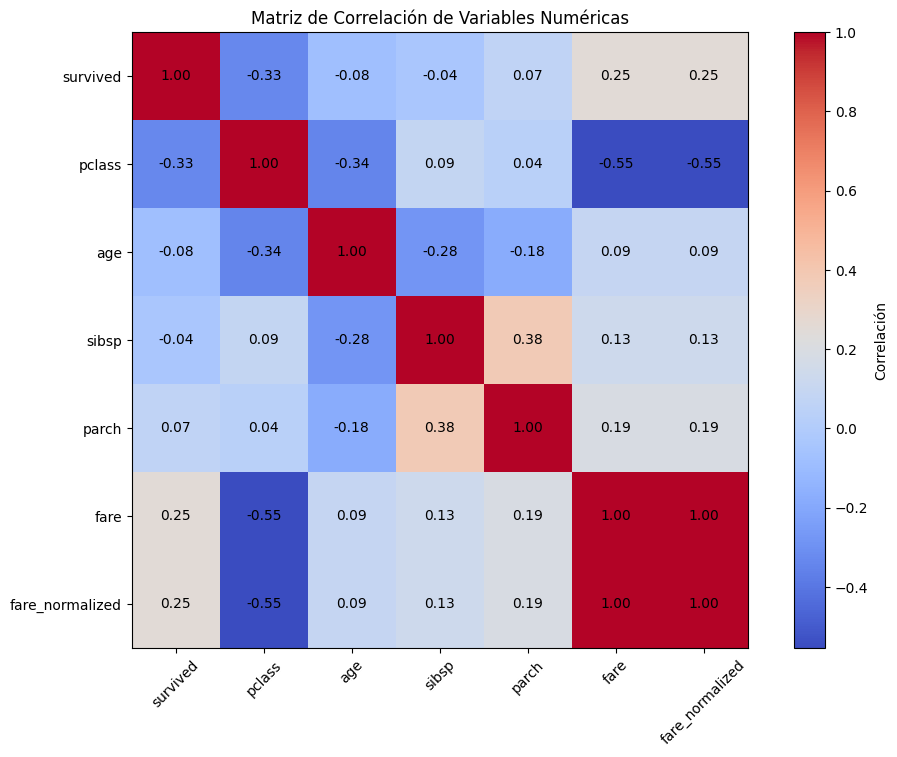

In [8]:
# Seleccionar solo las columnas numéricas para calcular la matriz de correlación
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación como un mapa de calor con Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación')
plt.title('Matriz de Correlación de Variables Numéricas')

# Agregar etiquetas a cada celda de la matriz de correlación
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="black")

# Configurar las etiquetas de los ejes
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.grid(False)
plt.show()
